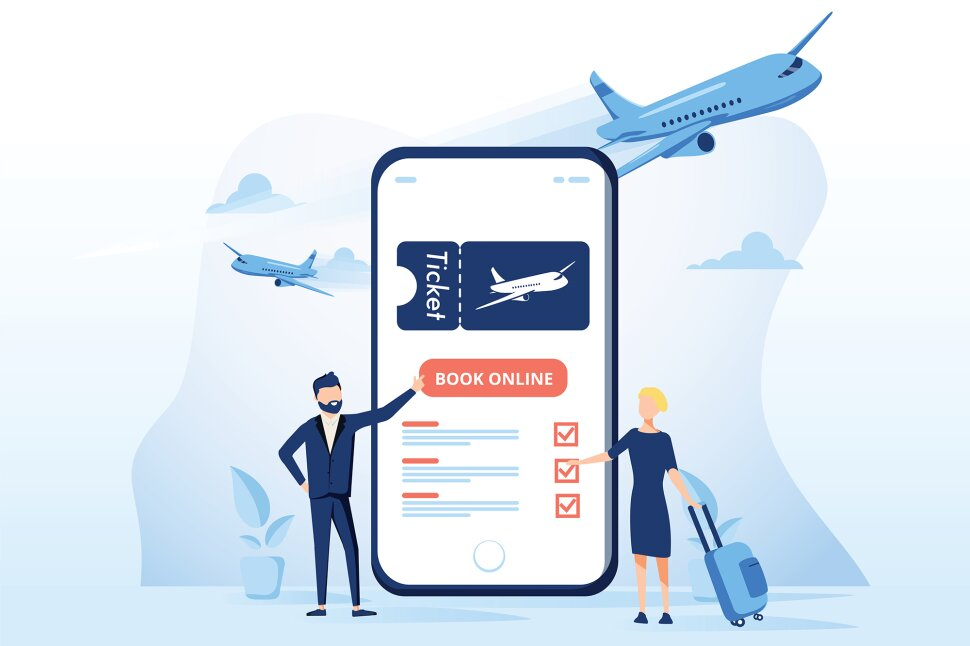

## Aim: Build a machine learning model to predict the price of the flight ticket. 

## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight


#### Target: Price: The price of the ticket

#### Import all the required library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
Test= pd.read_excel('D:\python\Flight_Ticket_Participant_Datasets\Flight_Test.xlsx')
Train =pd.read_excel('D:\python\Flight_Ticket_Participant_Datasets\Flight_Train.xlsx')

Train is Our training data Set   
Test is our testing dataset  

In [3]:
Train.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8885,IndiGo,09/03/2019,Banglore,New Delhi,BLR → STV → DEL,11:20,15:25,4h 5m,1 stop,No info,5746
6768,Jet Airways,24/06/2019,Delhi,Cochin,DEL → BOM → COK,19:45,12:35 25 Jun,16h 50m,1 stop,In-flight meal not included,10262
5247,Jet Airways,21/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,21:20,14h 20m,1 stop,In-flight meal not included,7832
5281,IndiGo,24/06/2019,Delhi,Cochin,DEL → HYD → COK,11:55,22:30,10h 35m,1 stop,No info,6442
603,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,07:40 16 Mar,23h 40m,1 stop,In-flight meal not included,9134
5600,IndiGo,6/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,01:30 07 May,14h 5m,1 stop,No info,6979
9854,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1 stop,No info,7618
551,Jet Airways,3/03/2019,Delhi,Cochin,DEL → BOM → COK,09:55,04:25 04 Mar,18h 30m,1 stop,No info,19828
2463,Vistara,27/04/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,non-stop,No info,5613
9080,Vistara,12/06/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,non-stop,No info,4878


In [4]:
Test.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
1391,GoAir,9/05/2019,Banglore,Delhi,BLR → DEL,11:40,14:30,2h 50m,non-stop,No info
756,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,No info
365,Multiple carriers,1/06/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1249,IndiGo,6/05/2019,Delhi,Cochin,DEL → BOM → COK,16:00,01:30 07 May,9h 30m,1 stop,No info
2382,SpiceJet,1/06/2019,Chennai,Kolkata,MAA → CCU,17:45,20:05,2h 20m,non-stop,No info
2015,Jet Airways,3/03/2019,Delhi,Cochin,DEL → BOM → COK,18:15,04:25 04 Mar,10h 10m,1 stop,No info
611,IndiGo,15/04/2019,Delhi,Cochin,DEL → HYD → COK,07:35,12:10,4h 35m,1 stop,No info
966,Air India,6/03/2019,Mumbai,Hyderabad,BOM → VGA → TIR → HYD,08:00,18:10,10h 10m,2 stops,No info
463,Air India,24/03/2019,Kolkata,Banglore,CCU → BOM → GOI → BLR,16:50,05:35 25 Mar,12h 45m,2 stops,No info
710,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,9h,1 stop,No info


## Data Analysis:

In [5]:
Train.shape

(10683, 11)

In [6]:
Test.shape

(2671, 10)

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## Data Information

###### Train Data: 

Train data having 10683 entries, 0 to 10682   
Train data have 10683 rows and  11 columns  
data having 1 int64 and 10 object   
 

##### Test Data:

Train data having  2671 entries, 0 to 2670  
Train data have 2671 rows and  10 columns  
data having and 10 object   
Data is having 2671 Non-Null values. 

##### Checking Null values

In [9]:
Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Train data having 1 null value present in Total_stop column and one present in Route column

In [10]:
Test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Testing data not having any null values. 

In [11]:
#Droping Null values
Train.dropna(inplace = True )

In [12]:
Train.shape

(10682, 11)

We gave removed null values.

### EDA

### Univariate Aanalysis

Text(0, 0.5, 'Counts')

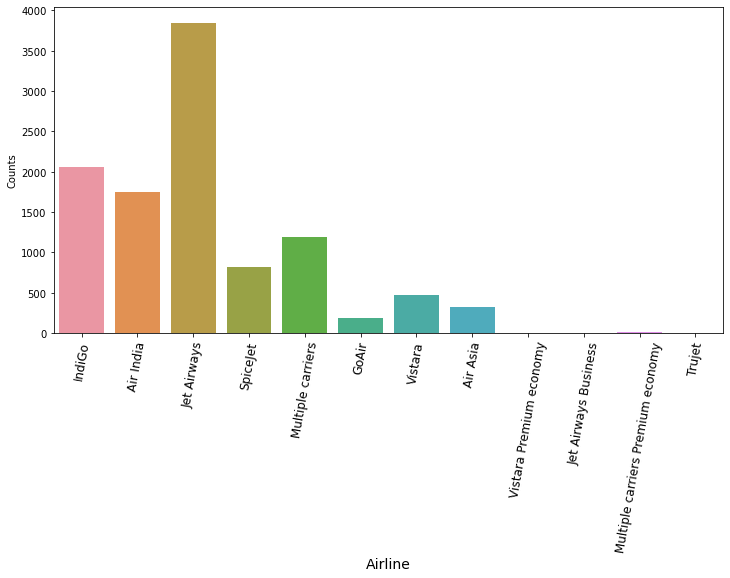

In [13]:
plt.figure(figsize= (12,6))
sns.countplot(Train['Airline'])
plt.xlabel('Airline', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

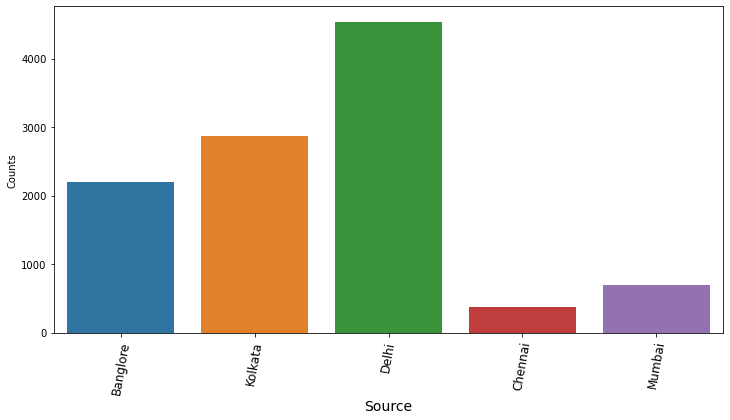

In [14]:
plt.figure(figsize= (12,6))
sns.countplot(Train['Source'])
plt.xlabel('Source', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

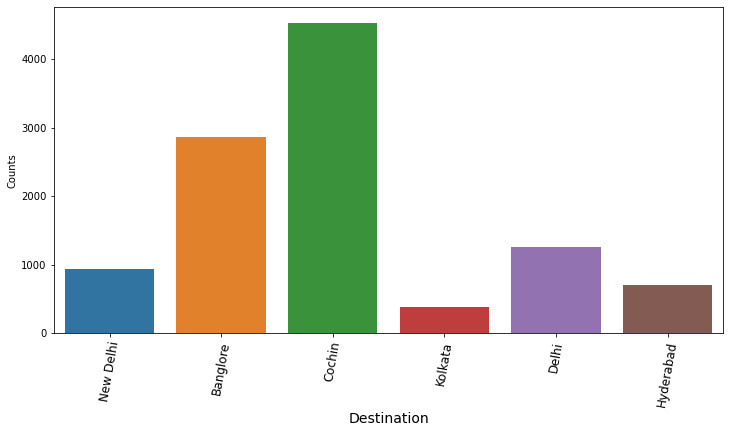

In [15]:
plt.figure(figsize= (12,6))
sns.countplot(Train['Destination'])
plt.xlabel('Destination', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

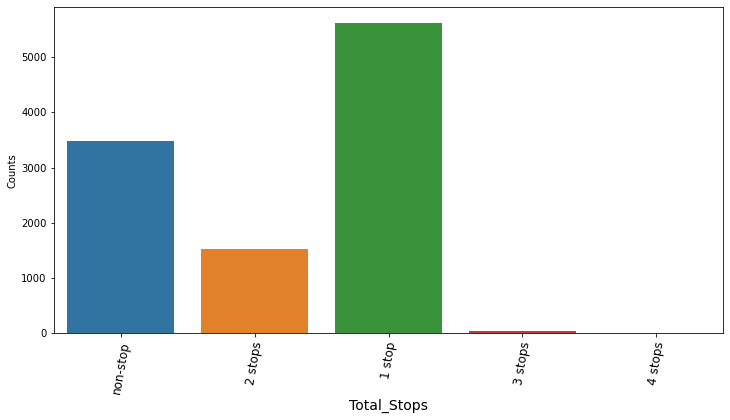

In [16]:
plt.figure(figsize= (12,6))
sns.countplot(Train['Total_Stops'])
plt.xlabel('Total_Stops', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

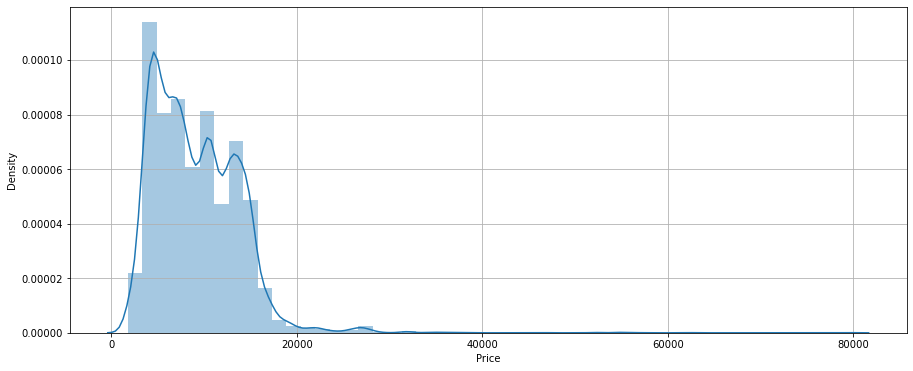

In [17]:
plt.figure(figsize=(15,6))
sns.distplot(Train['Price'])
plt.grid(True)
plt.show()

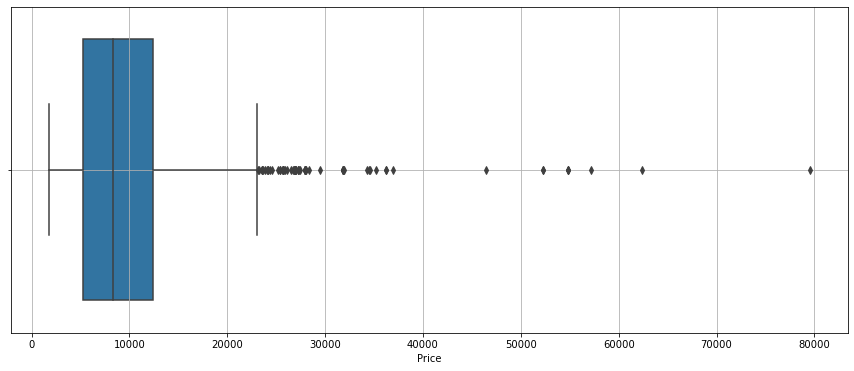

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(Train['Price'])
plt.grid(True)
plt.show()

1. Airline: We can see Jet Airways is the most used Airways. 
2. Source: Maximum flights begins from, Delhi. 
3. Destination: Maximum flights have destination as Cochin. 
4. Total_Stops: Maximum Number of flights having only 1 stop.
5. Probablity of price below 10000 is high data is normaly  distributes. Outliers present in the price. 

#### Bivariate Analysis

Here we will analyse Our Price with respect to other columns. 

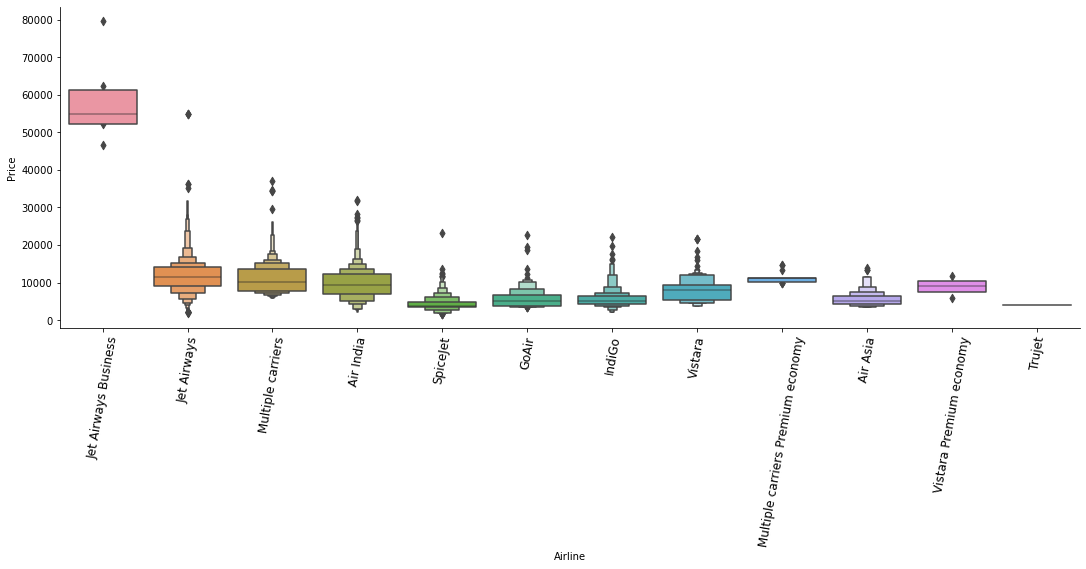

In [19]:
# Lets analyse the Airline vs Price
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = Train.sort_values("Price", ascending = False), kind="boxen",height = 5, aspect = 3)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Apart from the Jet Airways, almost all are having similar median

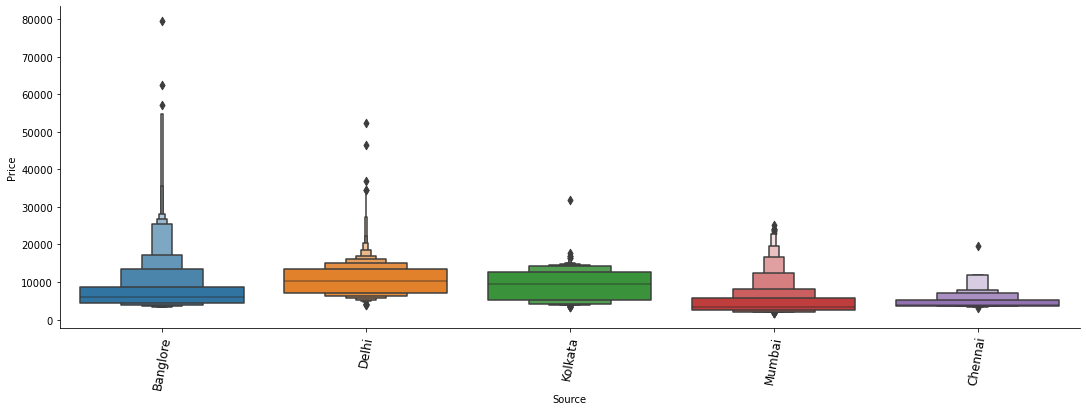

In [20]:
# Lets analyse the Source vs Price
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = Train.sort_values("Price", ascending = False), kind="boxen",height = 5, aspect = 3)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

We can see Source not having cosuderable effect on price. Median is almost same. 

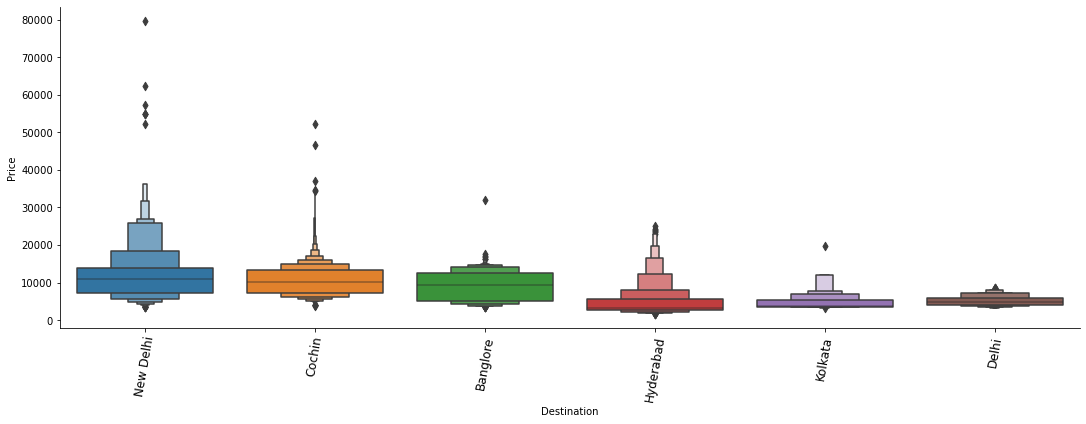

In [21]:
# Lets analyse the Destination vs Price
# Destination/vs Price
sns.catplot(y = "Price", x = "Destination", data = Train.sort_values("Price", ascending = False), kind="boxen",height = 5, aspect = 3)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

We can see same results for destination, Median are almost same. 

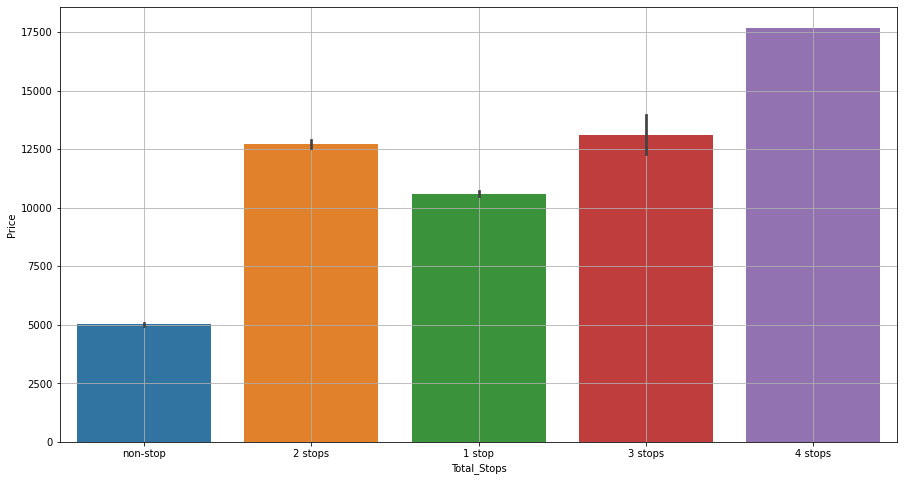

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x='Total_Stops',y='Price',data=Train)
plt.grid(True)
plt.show()

Here we can see Price is high for flight having 4-stops. 

## Data Preprocessing

In [23]:
Train["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → BOM → IXC → DEL                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → JLR → HYD                         1
CCU → IXZ → MAA → BLR                   1
BLR → HBX → BOM → BHO → DEL             1
Name: Route, Length: 128, dtype: int64

In [24]:
Train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [25]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other, We can drop Route  columns 

Train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [26]:
Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


From data information we can see that Date_of_Journey, Dep_Time,Arrival_Time is an object data type.

Therefore we have to convert this datatype into timestamp so that we can use this column for model Prediction. 

### .dt.day method will extract only the day of the data.  

### .dt.month method will only extract month of the data. 

In [27]:
Train['Journey_day']= pd.to_datetime(Train['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [28]:
Train['Journey_Month']= pd.to_datetime(Train['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [29]:
Train.head(3)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6


Now in our dataset we have created to columns , Journey_day, and Journey_Month,   
We will be droping Date_of_Journey column as we have day and month as a separate columns.  

In [30]:
# Droping Date_of_Journey 
Train.drop('Date_of_Journey',axis= 1, inplace= True)

In [31]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Train["Dep_hour"] = pd.to_datetime(Train["Dep_Time"]).dt.hour

# Extracting Minutes
Train["Dep_min"] = pd.to_datetime(Train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
Train.drop(["Dep_Time"], axis = 1, inplace = True)

In [32]:
Train.head(3)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25


In [33]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
Train["Arrival_hour"] = pd.to_datetime(Train.Arrival_Time).dt.hour

# Extracting Minutes
Train["Arrival_min"] = pd.to_datetime(Train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
Train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [34]:
Train.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25


In [35]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(Train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [36]:

# Adding duration_hours and duration_mins list to Train dataframe

Train["Duration_hours"] = duration_hours
Train["Duration_mins"] = duration_mins

In [37]:
Train.drop(["Duration"], axis = 1, inplace = True)

In [38]:
Train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [39]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int64 
 6   Journey_Month   10682 non-null  int64 
 7   Dep_hour        10682 non-null  int64 
 8   Dep_min         10682 non-null  int64 
 9   Arrival_hour    10682 non-null  int64 
 10  Arrival_min     10682 non-null  int64 
 11  Duration_hours  10682 non-null  int64 
 12  Duration_mins   10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.4+ MB


Here we can see we left with 4 columns having object data, Airline,  Source,  Destination,  Total_Stops
We will encode this oject data using Onehot and Lable Encoder. Lets do it

### Handling Categorical Data

We have two type of categorical data   
1. Nominal Data  : categorical data having no order *** For such data we use OneHotEncoder.   
2. Ordinal Data  : categorical data having Orders *** for such data we use LabelEncoder.  

In [40]:
Train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [41]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = Train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
Train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [43]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = Train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
Train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [45]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = Train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
Train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
#As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

Train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [48]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

Train_data = pd.concat([Train, Airline, Source, Destination], axis = 1)

In [49]:
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [50]:
Train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [51]:
Train_data.shape

(10682, 30)

# Test set

Here we will perform same steps for preprocessing which we used for Train set.

In [52]:
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
Test.shape

(2671, 10)

Here we have 2671 rows and 10 columns,   
We are not having Price column in our testing data. 

In [54]:
print("Test data Info")
print("*"*50)
print(Test.info())

Test data Info
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [55]:
print("Null values :")
print("*"*30)
print(Test.isnull().sum())


Null values :
******************************
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


We can see data is not having any null values. 

## EDA

In [56]:
# Date_of_Journey
Test["Journey_day"] = pd.to_datetime(Test.Date_of_Journey, format="%d/%m/%Y").dt.day
Test["Journey_month"] = pd.to_datetime(Test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
Test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [57]:
# Dep_Time
Test["Dep_hour"] = pd.to_datetime(Test["Dep_Time"]).dt.hour
Test["Dep_min"] = pd.to_datetime(Test["Dep_Time"]).dt.minute
Test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
Test["Arrival_hour"] = pd.to_datetime(Test.Arrival_Time).dt.hour
Test["Arrival_min"] = pd.to_datetime(Test.Arrival_Time).dt.minute
Test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [58]:
# Duration
duration = list(Test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [59]:
# Adding Duration column to test set
Test["Duration_hours"] = duration_hours
Test["Duration_mins"] = duration_mins
Test.drop(["Duration"], axis = 1, inplace = True)

In [60]:
# Categorical data
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = Test[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [61]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = Test[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [62]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = Test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [63]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
Test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [64]:
# Replacing Total_Stops
Test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [65]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
Test_data = pd.concat([Test, Airline, Source, Destination], axis = 1)

In [74]:
Test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [75]:
pd.set_option('display.max_columns', 500)

In [81]:
Train_data.drop(["Airline_Trujet"],axis = 1, inplace = True)

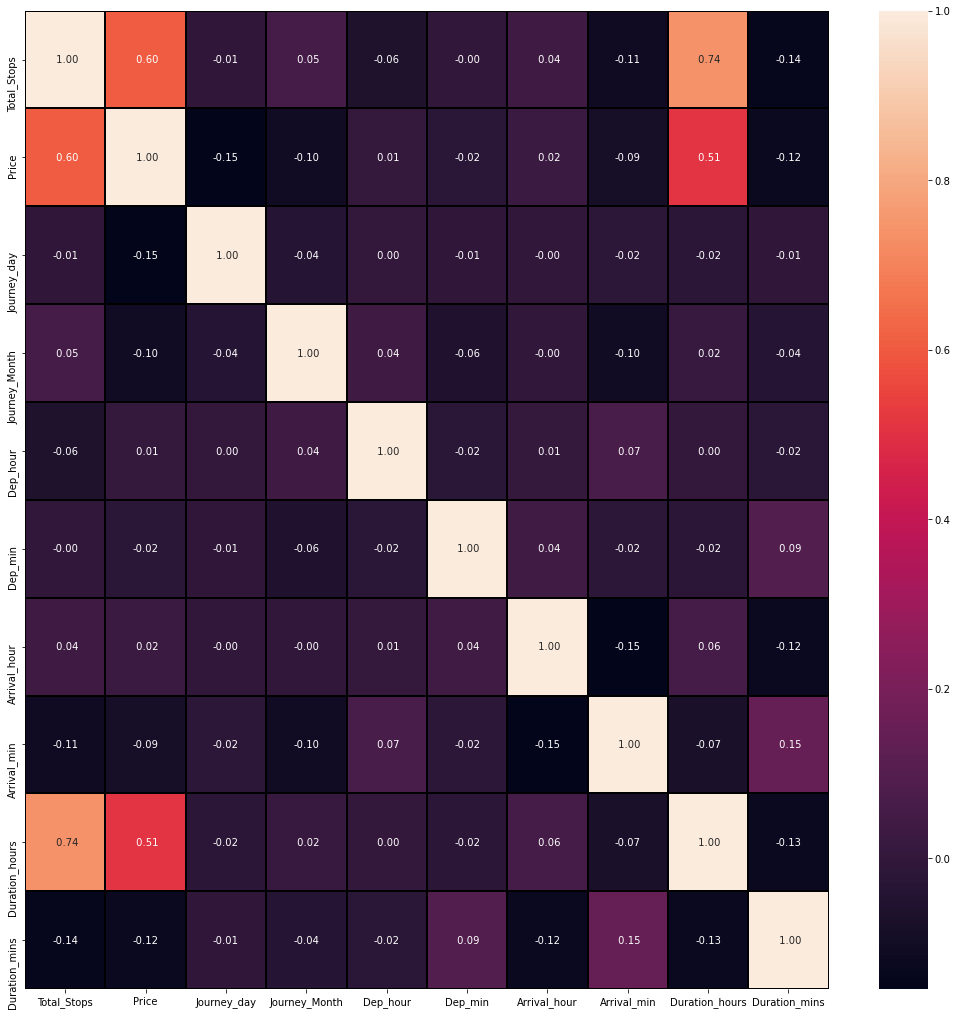

In [86]:
# Finding correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(Train.corr(), annot = True, linewidths=1,linecolor='black',fmt=' .2f' )
plt.show()

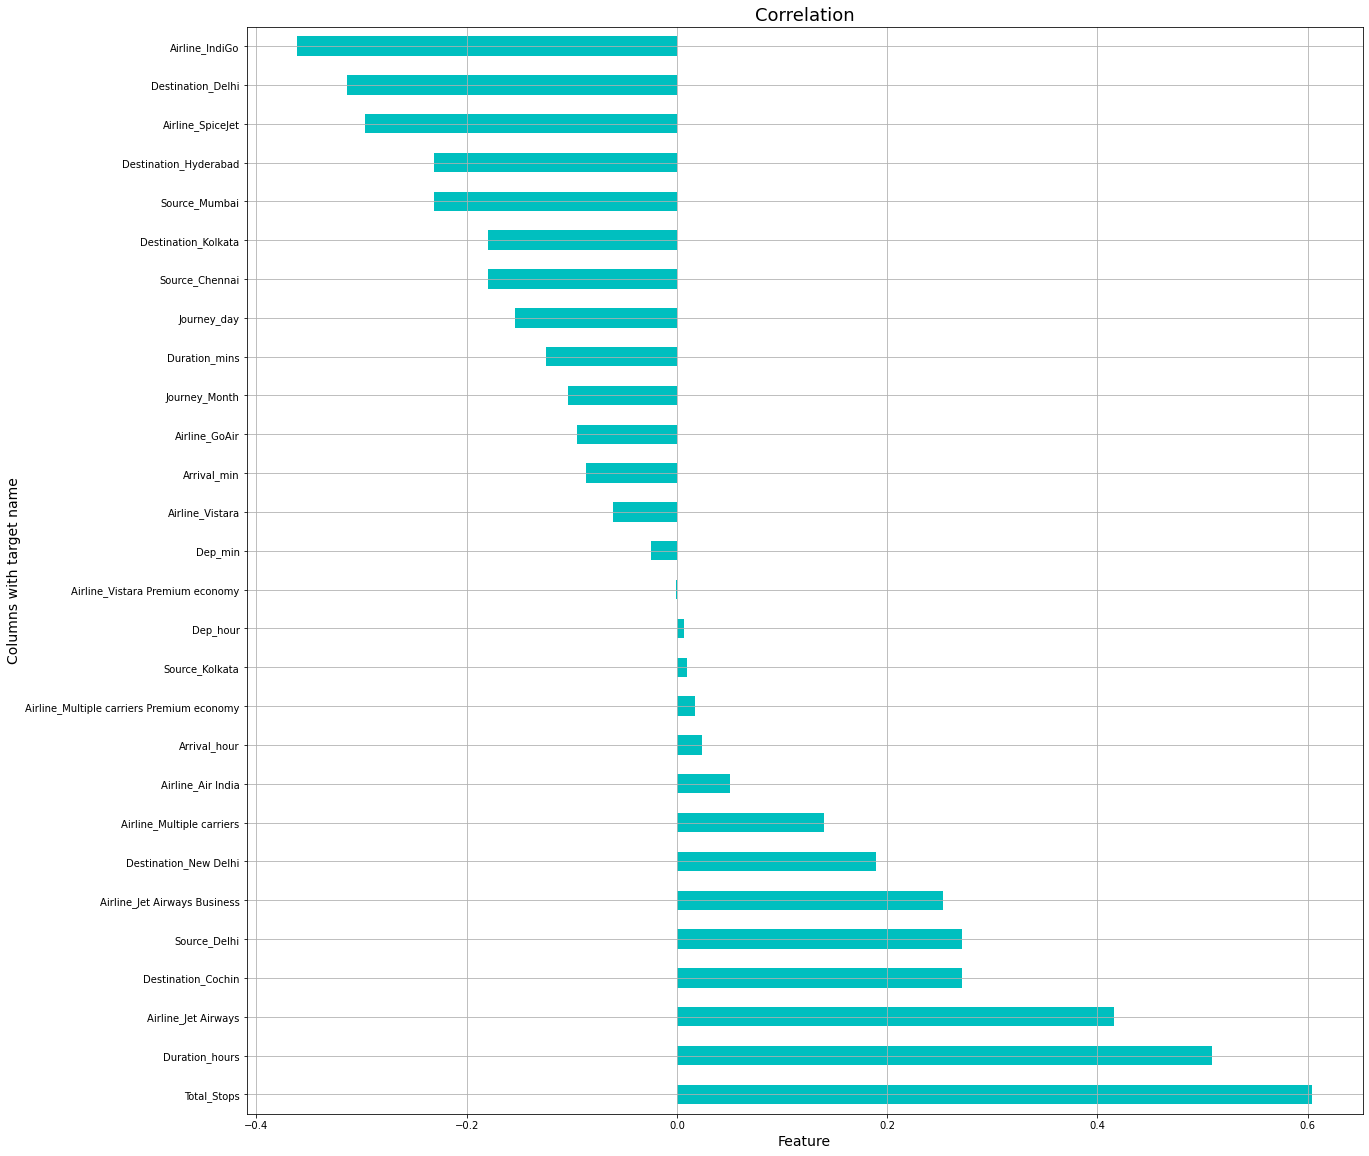

In [87]:
plt.figure(figsize=(20,20))
Train_data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the targat,  
and Features on the left of the 0.0 are having negative or 0 correlation.   

In [88]:
Train_data.head()

,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Here Our Features are categorical so no need to check for Outliers and Skewness.

## Scaling the data Using StandardScaler

Here we can see our data is almost scaled, only Journey_day, Journey_Month, Dep_hour, Dep_min, Arrival_hour, Arrival_min, Duration_hours, Duration_mins need scalign. 

In [89]:
Scale= Train_data.iloc[:,2:10]

We will scale only Specific columns. 

In [91]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
Scaled=SDC.fit_transform(Scale)

In [93]:
Scaled_data= pd.DataFrame(data= Scaled, columns=['Journey_day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'])

In [94]:
Scaled_data

,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041
1,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319
2,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678
3,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319
4,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969
...,...,...,...,...,...,...,...,...
10677,-0.531796,-0.608557,1.132283,1.630034,1.261236,0.018745,-0.970614,0.098753
10678,1.591104,-0.608557,1.306240,1.097181,1.407030,-0.284175,-0.970614,0.393825
10679,1.591104,-0.608557,-0.781243,-0.234950,-0.342497,-0.284175,-0.852891,-1.671678
10680,-1.475307,-1.467402,-0.259372,0.297903,0.094885,-0.890014,-0.970614,0.688897


In [95]:
Train_data.drop(['Journey_day', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours','Duration_mins'], axis= 1 , inplace= True )

In [97]:
Train_data.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
Train_new = pd.concat([Scaled_data, Train_data ], axis = 1)

In [100]:
Train_new.

(10683, 29)

In [106]:
Scale1= Test_data.iloc[:,1:9]

In [108]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
Scaled=SDC.fit_transform(Scale1)

In [109]:
Scaled_data1= pd.DataFrame(data= Scaled, columns=['Journey_day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'])

In [115]:
Test_data.drop(['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'], axis=1, inplace= True )

In [117]:
Test_new = pd.concat([Scaled_data1, Test_data ], axis = 1)

In [124]:
Train_new.dropna(inplace= True)

In [125]:
#Dividing into Fetaures and Target. 
x=Train_new.drop(['Price'],axis=1)
y=Train_new['Price']

In [126]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [128]:
calc_vif(x)

,variables,VIF FACTOR
0,Journey_day,1.019808
1,Journey_Month,1.204354
2,Dep_hour,1.043587
3,Dep_min,1.078702
4,Arrival_hour,1.069459
5,Arrival_min,1.112173
6,Duration_hours,1.789431
7,Duration_mins,1.118740
8,Total_Stops,2.781830
9,Airline_Air India,6.020557


We can see few columns having inf values, means infinity, we drop one by one and check at every step. 

In [129]:
x.drop(['Source_Chennai'],axis=1, inplace= True)
Test_new.drop(['Source_Chennai'],axis=1, inplace= True)

In [131]:
calc_vif(x)

,variables,VIF FACTOR
0,Journey_day,1.019808
1,Journey_Month,1.204354
2,Dep_hour,1.043587
3,Dep_min,1.078702
4,Arrival_hour,1.069459
5,Arrival_min,1.112173
6,Duration_hours,1.789431
7,Duration_mins,1.118740
8,Total_Stops,2.781830
9,Airline_Air India,6.020557


In [132]:
x.drop(['Source_Delhi'],axis=1, inplace= True)
Test_new.drop(['Source_Delhi'],axis=1, inplace= True)

In [133]:
calc_vif(x)

,variables,VIF FACTOR
0,Journey_day,1.019808
1,Journey_Month,1.204354
2,Dep_hour,1.043587
3,Dep_min,1.078702
4,Arrival_hour,1.069459
5,Arrival_min,1.112173
6,Duration_hours,1.789431
7,Duration_mins,1.118740
8,Total_Stops,2.781830
9,Airline_Air India,6.020557


In [134]:
x.drop(['Source_Mumbai'],axis=1, inplace= True)
Test_new.drop(['Source_Mumbai'],axis=1, inplace= True)

In [135]:
calc_vif(x)

,variables,VIF FACTOR
0,Journey_day,1.019808
1,Journey_Month,1.204354
2,Dep_hour,1.043587
3,Dep_min,1.078702
4,Arrival_hour,1.069459
5,Arrival_min,1.112173
6,Duration_hours,1.789431
7,Duration_mins,1.118740
8,Total_Stops,2.781830
9,Airline_Air India,6.020557


In [136]:
x.drop(['Destination_Cochin'],axis=1, inplace= True)
Test_new.drop(['Destination_Cochin'],axis=1, inplace= True)

In [137]:
calc_vif(x)

,variables,VIF FACTOR
0,Journey_day,1.018655
1,Journey_Month,1.204150
2,Dep_hour,1.042678
3,Dep_min,1.069847
4,Arrival_hour,1.068421
5,Arrival_min,1.112011
6,Duration_hours,1.743941
7,Duration_mins,1.118656
8,Total_Stops,6.110104
9,Airline_Air India,3.065193


Here we can see VIF is less than 10, we can proceed further now. 

In [140]:
Test_new.shape

(2671, 24)

In [143]:
x.shape

(10681, 24)

## Model Design

In [144]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## 1.LinearRegression

In [145]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  6 The Model performing Well
At Random State 6
Training Accuracy score is- 61.609386082706166
Testing Accuracy Score is- 61.60848579519816
At Random state  163 The Model performing Well
At Random State 163
Training Accuracy score is- 61.61346702504091
Testing Accuracy Score is- 61.62620487182012
At Random state  170 The Model performing Well
At Random State 170
Training Accuracy score is- 61.57455479263641
Testing Accuracy Score is- 61.56289597038599
At Random state  328 The Model performing Well
At Random State 328
Training Accuracy score is- 61.6231574631941
Testing Accuracy Score is- 61.59644777869184
At Random state  405 The Model performing Well
At Random State 405
Training Accuracy score is- 61.57825241693684
Testing Accuracy Score is- 61.55248149872943
At Random state  408 The Model performing Well
At Random State 408
Training Accuracy score is- 61.52993079024769
Testing Accuracy Score is- 61.50854907672111
At Random state  493 The Model performing Well
At Random

At Random State 635  
Training Accuracy score is- 61.62096568621409  
Testing Accuracy Score is- 61.6205213846007  


At Random Stat 635 we are getting very less diffrence in training and testing accuracy.

In [146]:
x.shape

(10681, 24)

In [147]:
y.shape

(10681,)

In [148]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=635,test_size=0.20)

In [149]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.616205213846007


### Cross Validation of Model

In [151]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 60.92487869520238 and Accuracy score is 61.6205213846007
At cross fold 3 the Cross Val score is 61.053806116454325 and Accuracy score is 61.6205213846007
At cross fold 4 the Cross Val score is 61.24818140399657 and Accuracy score is 61.6205213846007
At cross fold 5 the Cross Val score is 61.132852711471855 and Accuracy score is 61.6205213846007
At cross fold 6 the Cross Val score is 61.19682018871582 and Accuracy score is 61.6205213846007
At cross fold 7 the Cross Val score is 61.093518028290475 and Accuracy score is 61.6205213846007
At cross fold 8 the Cross Val score is 61.175548360460105 and Accuracy score is 61.6205213846007
At cross fold 9 the Cross Val score is 61.154115631420645 and Accuracy score is 61.6205213846007


In [152]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 2011.6021501796013
Mean Squared Error: 8267749.099490025
Root Mean Square Error: 2875.3693848773632


At cross fold 4 the Cross Val score is 61.24818140399657 and Accuracy score is 61.6205213846007

### 2. Lasso

In [153]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=4,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 61.60805861603371
Cross val Score : 61.2285553952469


In [154]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 2012.2462152289825
Mean Squared Error: 8270433.84267347
Root Mean Square Error: 2875.836198859989


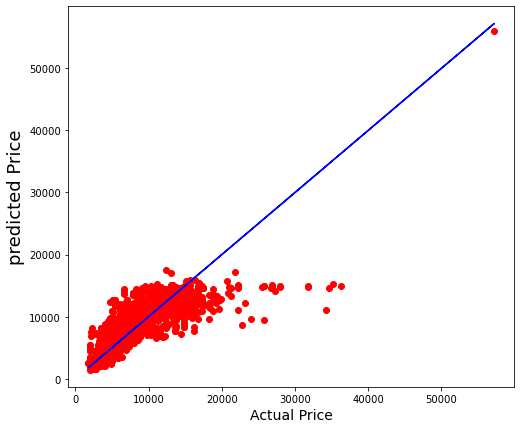

In [155]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price', fontsize= 14 )
plt.ylabel('predicted Price', fontsize= 18)
plt.show()

R2 score: 61.60805861603371  
Cross val Score : 61.2285553952469  
Both the score having less diffrence, But accurcy errors are high.

### 3. Ridge

In [156]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=4, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  61.500942859227315
Cross val Score 61.088222503310604


In [157]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 2016.719220159265
Mean Squared Error: 8293508.835712117
Root Mean Square Error: 2879.8452798218373


r2 score:  61.50042294942792  
Cross val Score 61.08780097804064   
Both the score are having less difference, but score is very less. 

### 3. Decision TreeRegressor

In [158]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=4,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 65.48280898353347
Cross Val Score: 47.81327241808273


In [159]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 1582.7576587115896
Mean Squared Error: 7435730.896792623
Root Mean Square Error: 2726.853662518879


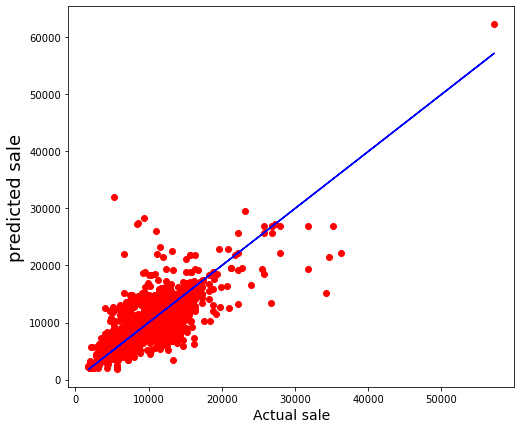

In [160]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 65.48280898353347   
Cross Val Score: 47.81327241808273     
Performance is not good, lets try another model.   

### 4. KNeighborsRegressor

In [161]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=4, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 67.3014944839466
Cross val Score : 59.02342142444331


In [162]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 1686.8825456247075
Mean Squared Error: 7043947.684754329
Root Mean Square Error: 2654.043647861566


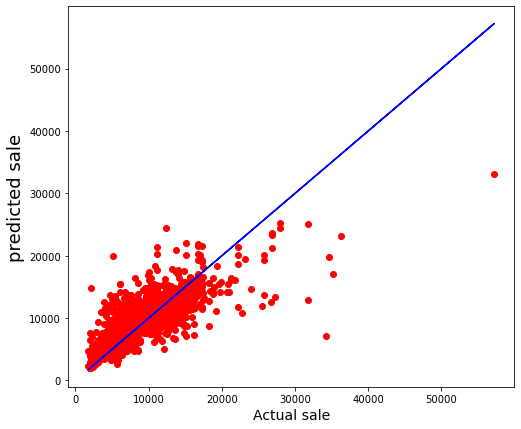

In [163]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 0 67.3014944839466  
Cross val Score : 59.02342142444331  
Both the Score having considerable diffrence , Linear regression is still best model.  

### 5. Ensemble Techniques

In [164]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=2, n_estimators=100)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=4, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 78.2028170565809
Cross val Score : 64.38919456576615


In [165]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 1332.9566784878668
Mean Squared Error: 4695572.898678308
Root Mean Square Error: 2166.9270635345133


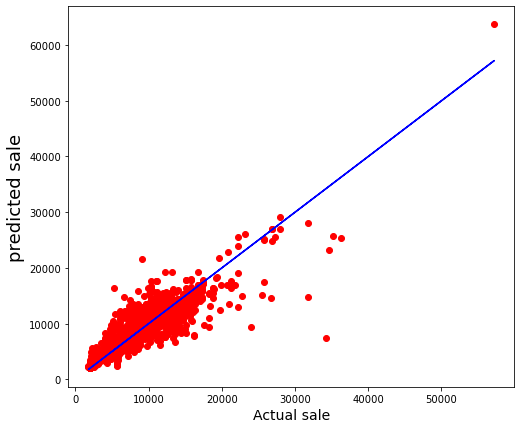

In [166]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 78.2028170565809   
Cross val Score : 64.38919456576615   
R2 Score increased but still diffrence is big between both the score.   

### 7. GradientBoostingRegressor

In [169]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 78.2028170565809
Cross val Score : 64.70202652629484


In [170]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 1332.9566784878668
Mean Squared Error: 4695572.898678308
Root Mean Square Error: 2166.9270635345133


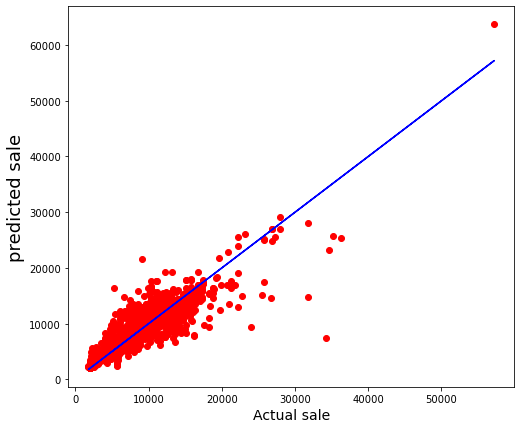

In [171]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 78.2028170565809   
Cross val Score : 64.70202652629484  
Both the score having big diffrence, lasso is still best model

## Lets Try Hyper Parameter Tuning

We try Hyper para mere Tuning on Lasso, GradientBoostingRegressor,RandomForestRegressor

In [172]:
# Hyper Parameter tuning on  Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'selection':['cyclic', 'random'], 'max_iter':[500,1000,1200,1500,2000]}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 1, 'max_iter': 500, 'random_state': 2, 'selection': 'random'}


In [173]:
ls=Lasso(alpha=1,max_iter=500, random_state=2, selection='random')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=4, scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 61.608082000724686
Cross val Score : 61.228561298300754


We can see still score is almost same as earlier score. Lets try another model. 

In [175]:
# Random Forest
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[10,20,30,70, 100], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 70}


In [176]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=10, n_estimators=70)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=5, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 79.74139065515362
Cross val Score : 68.15457698959207


We can see we there is big diffrence in CV score and R2 score,   
lasso is still best  

In [ ]:
# GradientBoostingRegressor hyper parameter tuning. 

In [177]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [178]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=5, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 79.74139065515362
Cross val Score : 64.08181611218728


## R2 score: 61.60805861603371 and Cross val Score : 61.2285553952469  Linear lasso is still our best model. 


In [179]:
import pickle
filename='Evaluation_Project_Flight_Price_Prediction.pkl'
pickle.dump(ls,open(filename,'wb'))

In [180]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(ls.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,8586.0,11848.896506
1,3100.0,4922.989187
2,3383.0,3374.497874
3,1965.0,3354.582153
4,6582.0,6144.314052
...,...,...
2132,15554.0,11341.701189
2133,10368.0,14241.838973
2134,9187.0,9618.041314
2135,6781.0,12104.117511


In [181]:
loaded_model = pickle.load(open(filename,'rb'))

In [182]:
prediction=loaded_model.predict(Test_new)

In [183]:
print(prediction)

[11705.91542271  7348.64620063 11006.05674135 ... 12755.36782492
  9803.85251447 10068.62128348]


In [188]:
predicted= pd.DataFrame(data=prediction)

predicted.to_csv('prediction.csv',index=False)